# Part 1

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [87]:
img = cv2.imread(r"D:\MIT WPU B.Tech Data\3nd Year Data\IPPR\low_contrast_image.png", cv2.IMREAD_GRAYSCALE)

In [88]:
hist_original = cv2.calcHist(
    [img],      
    [0],        
    None,       
    [256],      
    [0, 256]   
)


In [89]:
equalized_img = cv2.equalizeHist(img)

hist_equalized = cv2.calcHist(
    [equalized_img],
    [0],
    None,
    [256],
    [0, 256]
)


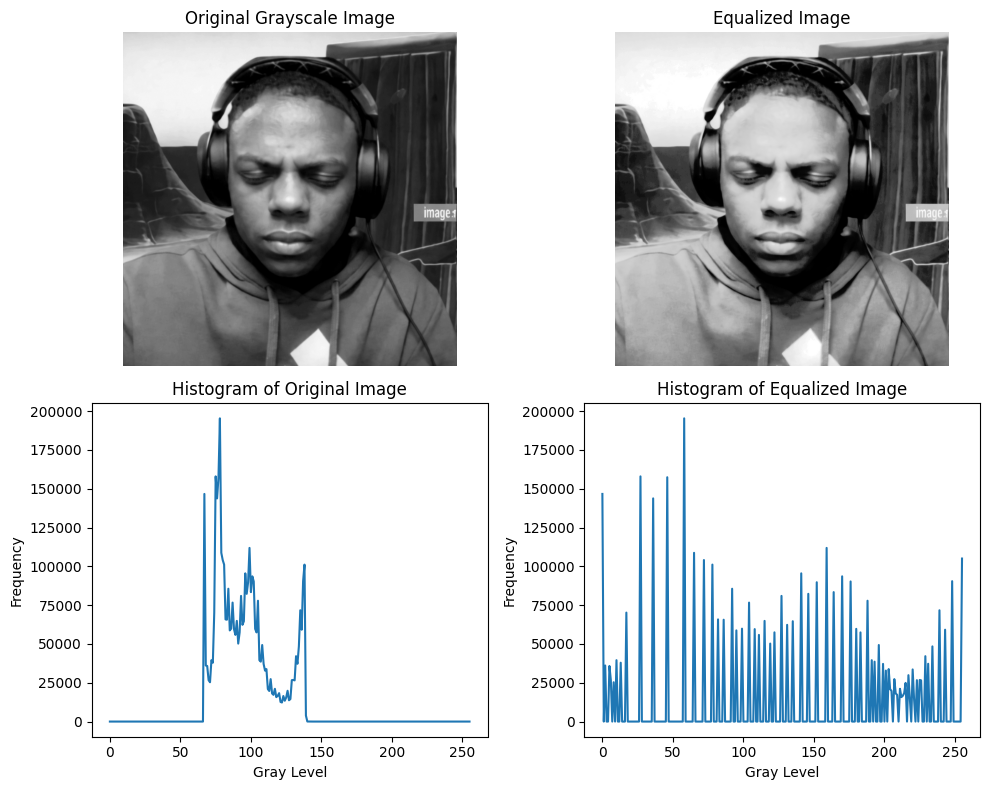

In [90]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Histogram of Original Image")
plt.plot(hist_original)
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.title("Histogram of Equalized Image")
plt.plot(hist_equalized)
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Part 2

In [91]:
img_rgb = cv2.imread(r"D:\MIT WPU B.Tech Data\3nd Year Data\IPPR\charlie-kirk-charlie-kirk-meme.gif")
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)


In [92]:
R, G, B = cv2.split(img_rgb)

hist_R = cv2.calcHist([R], [0], None, [256], [0,256])
hist_G = cv2.calcHist([G], [0], None, [256], [0,256])
hist_B = cv2.calcHist([B], [0], None, [256], [0,256])

In [93]:
R_eq = cv2.equalizeHist(R)
G_eq = cv2.equalizeHist(G)
B_eq = cv2.equalizeHist(B)

img_rgb_eq = cv2.merge((R_eq, G_eq, B_eq))

hist_R_eq = cv2.calcHist([R_eq], [0], None, [256], [0,256])
hist_G_eq = cv2.calcHist([G_eq], [0], None, [256], [0,256])
hist_B_eq = cv2.calcHist([B_eq], [0], None, [256], [0,256])

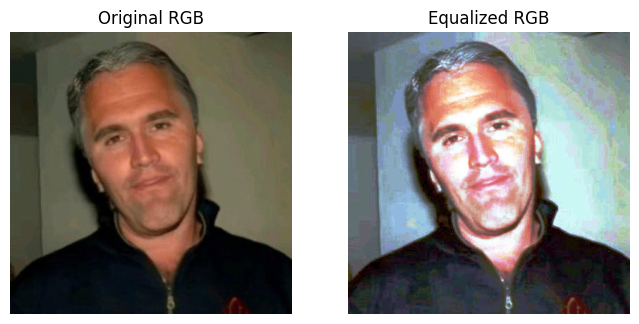

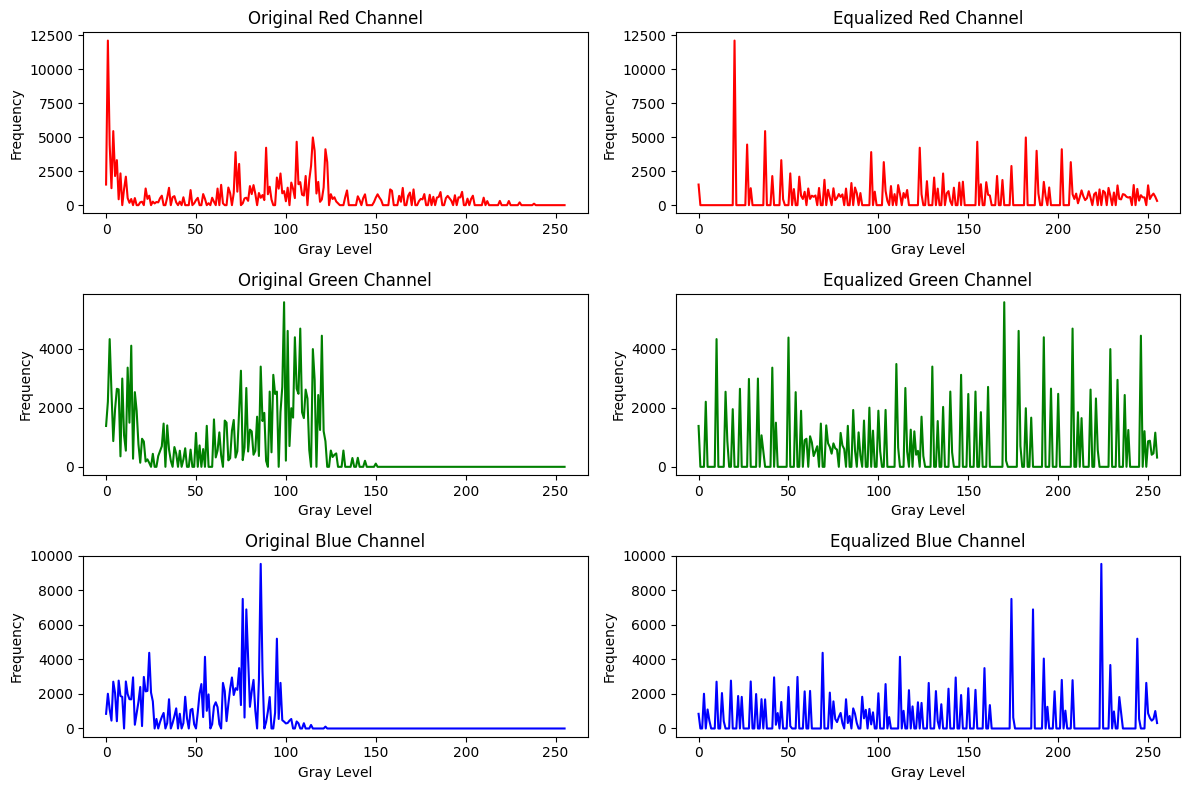

In [94]:

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original RGB")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Equalized RGB")
plt.imshow(img_rgb_eq)
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title("Original Red Channel")
plt.plot(hist_R, color='r')
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(3, 2, 2)
plt.title("Equalized Red Channel")
plt.plot(hist_R_eq, color='r')
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.title("Original Green Channel")
plt.plot(hist_G, color='g')
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
plt.title("Equalized Green Channel")
plt.plot(hist_G_eq, color='g')
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.title("Original Blue Channel")
plt.plot(hist_B, color='b')
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(3, 2, 6)
plt.title("Equalized Blue Channel")
plt.plot(hist_B_eq, color='b')
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Convert the RGB image to HSI

In [95]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

In [96]:
H, S, V = cv2.split(img_hsv)

hist_V = cv2.calcHist([V], [0], None, [256], [0,256])

V_eq = cv2.equalizeHist(V)

hist_V_eq = cv2.calcHist([V_eq], [0], None, [256], [0,256])

img_hsv_eq = cv2.merge((H, S, V_eq))

### Convert the HSI image back to RGB

In [97]:
img_rgb_hsi_eq = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB)

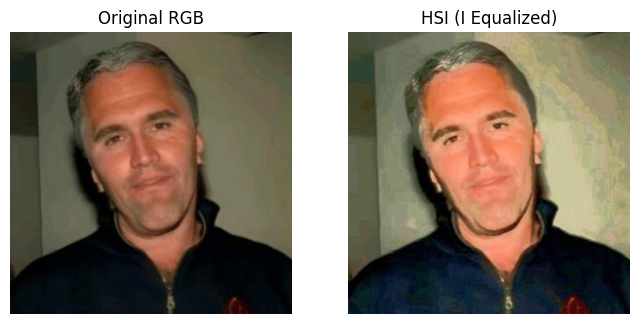

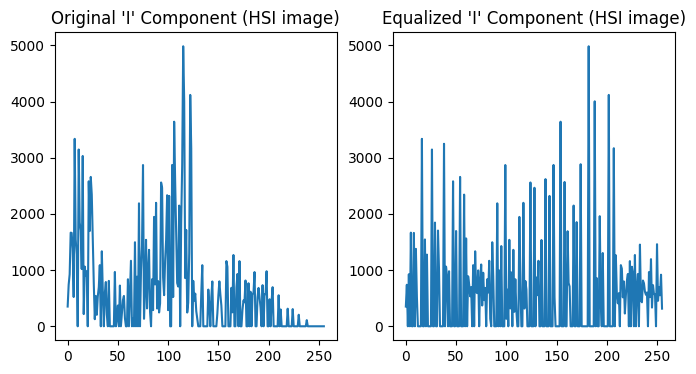

In [98]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original RGB")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("HSI (I Equalized)")
plt.imshow(img_rgb_hsi_eq)
plt.axis("off")
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original 'I' Component (HSI image)")
plt.plot(hist_V)

plt.subplot(1,2,2)
plt.title("Equalized 'I' Component (HSI image)")
plt.plot(hist_V_eq)

plt.show()

### Calculating the histogram and equlizing the image manually

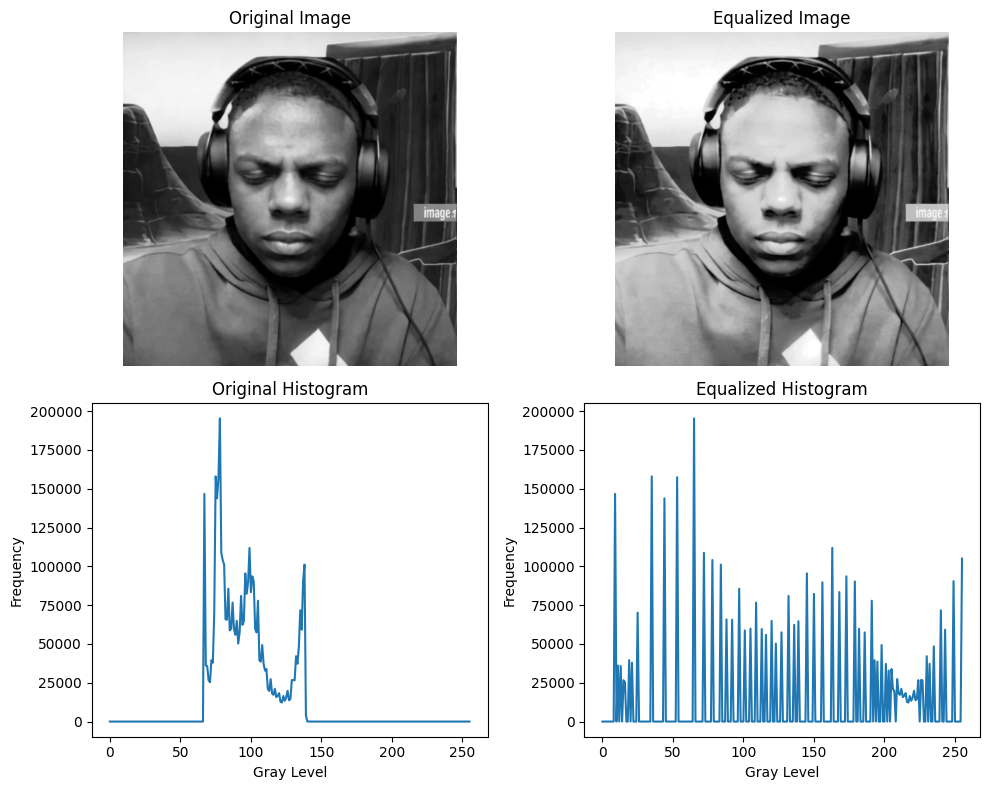

In [99]:
img = cv2.imread(r"D:\MIT WPU B.Tech Data\3nd Year Data\IPPR\low_contrast_image.png", cv2.IMREAD_GRAYSCALE)

rows, cols = img.shape
n = rows * cols
L = 256

hist = np.zeros(L, dtype=int)
for i in range(rows):
    for j in range(cols):
        hist[img[i, j]] += 1

cum_hist = np.zeros(L, dtype=int)
cum_hist[0] = hist[0]
for k in range(1, L):
    cum_hist[k] = cum_hist[k - 1] + hist[k]

cdf = cum_hist / n
mapping = np.round(cdf * (L - 1)).astype(np.uint8)

equalized_img = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        equalized_img[i, j] = mapping[img[i, j]]

hist_eq = np.zeros(L, dtype=int)
for i in range(rows):
    for j in range(cols):
        hist_eq[equalized_img[i, j]] += 1

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.plot(hist)
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.plot(hist_eq)
plt.xlabel("Gray Level")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Changing the bin component in the calcHist() function 

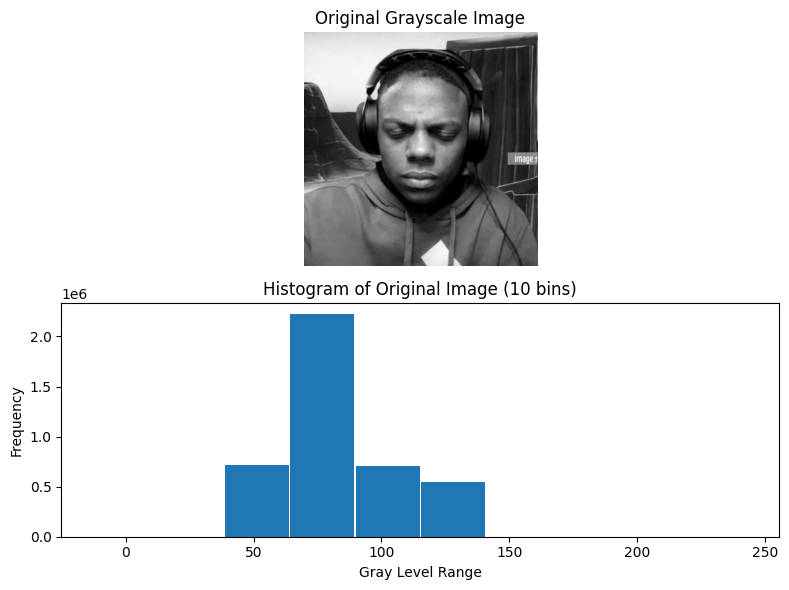

In [100]:
hist_original = cv2.calcHist(
    [img],
    [0],
    None,
    [10],
    [0, 256]
)

bin_edges = np.linspace(0, 256, 11)

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2, 1, 2)
plt.title("Histogram of Original Image (10 bins)")
plt.bar(bin_edges[:-1], hist_original.flatten(), width=25)
plt.xlabel("Gray Level Range")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
